In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_df = pd.read_csv('./train.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


【問題1】練習のために特徴量の選択
----
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
train_df_explain = train_df.loc[:, ['GrLivArea', 'YearBuilt']]
train_df_target = train_df.loc[:, ['SalePrice']]

train_df_explain_exp_tar = pd.merge(train_df_target, train_df_explain, left_index=True , right_index=True)

train_df_target

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [4]:
train_df_explain

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
...,...,...
1455,1647,1999
1456,2073,1978
1457,2340,1941
1458,1078,1950


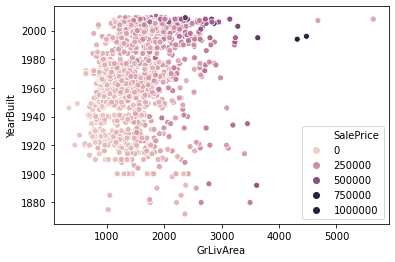

In [5]:
sns.scatterplot(x='GrLivArea', y='YearBuilt', data=train_df, hue='SalePrice')

In [6]:
from sklearn import preprocessing

#標準化の実施
ss = preprocessing.StandardScaler()

train_df_explain_exp_tar_standardization = ss.fit_transform(train_df_explain_exp_tar)
type(train_df_explain_exp_tar_standardization)

numpy.ndarray

In [7]:
train_df_explain_exp_tar_standardization

array([[ 0.34727322,  0.37033344,  1.05099379],
       [ 0.00728832, -0.48251191,  0.15673371],
       [ 0.53615372,  0.51501256,  0.9847523 ],
       ...,
       [ 1.07761115,  1.56964722, -1.00249232],
       [-0.48852299, -0.83278768, -0.70440562],
       [-0.42084081, -0.49393395, -0.20759447]])

In [8]:
train_df_explain_exp_tar_standardization = pd.DataFrame(train_df_explain_exp_tar_standardization)

In [9]:
train_df_explain_exp_tar_standardization

,0,1,2
0,0.347273,0.370333,1.050994
1,0.007288,-0.482512,0.156734
2,0.536154,0.515013,0.984752
3,-0.515281,0.383659,-1.863632
4,0.869843,1.299326,0.951632
...,...,...,...
1455,-0.074560,0.250402,0.918511
1456,0.366161,1.061367,0.222975
1457,1.077611,1.569647,-1.002492
1458,-0.488523,-0.832788,-0.704406


In [10]:
train_df_explain_exp_tar_standardization.loc[:,[0,1]]

,0,1
0,0.347273,0.370333
1,0.007288,-0.482512
2,0.536154,0.515013
3,-0.515281,0.383659
4,0.869843,1.299326
...,...,...
1455,-0.074560,0.250402
1456,0.366161,1.061367
1457,1.077611,1.569647
1458,-0.488523,-0.832788


In [11]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
from sklearn.model_selection import train_test_split #テストデータと訓練データを分けるためのメソッド
from sklearn import metrics
clf = linear_model.LinearRegression()

#データとレーニング用とテスト用に分ける
X_train, X_test, Y_train, Y_test = train_test_split(train_df_explain_exp_tar_standardization.loc[:,[0,1]], train_df_explain_exp_tar_standardization.loc[:,[2]]) #トレーニングデータとテストデータに分ける


# 説明変数に "density (濃度)" を利用
X = X_train
 
# 目的変数に "alcohol (アルコール度数)" を利用
Y = Y_train
 
# 予測モデルを作成
clf.fit(X, Y)

Y_pred = clf.predict(X_test)
 
# 回帰係数
print(clf.coef_)
 
# 切片 (誤差)
print(clf.intercept_)
 
# 決定係数
print(clf.score(X, Y))



[[ 0.77372838 -0.35652913]]
[0.01253636]
0.3354116496880122


In [12]:
# 評価
# metrics.accuracy_score(Y_test.round().astype(int), Y_pred)

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。
---


- 公式ドキュメント：　https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
- 参考文献：　https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/

y_test.values.tolist() DataFrameをarray型に変更
---

In [13]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)

#平均二乗誤差 (MSE)の実行

0.6233357488152539

【問題3】手法の比較
---
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。
- 線形回帰
- SVM
- 決定木
- ランダムフォレスト


In [14]:
Y_pred.shape

(365, 1)

In [15]:
Y_test

,2
12,-0.306957
1259,-0.075111
171,-0.373198
1105,0.752907
320,1.150356
...,...
257,1.150356
532,-0.538802
1049,-0.836889
1458,-0.704406


In [16]:
#描画の関数を使う
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

Y_pred = pd.DataFrame(Y_pred)
Y_pred['result'] = 1

# sns.scatterplot(x = Y_test.values, y = Y_pred, )

In [17]:
Y_test.shape

(365, 1)

In [18]:
Y_pred = Y_pred.rename(columns={0: 'SalePrice'})

In [19]:
Y_pred

,SalePrice,result
0,0.062400,1
1,0.034222,1
2,0.249176,1
3,0.665247,1
4,0.854786,1
...,...,...
360,0.333183,1
361,-0.235522,1
362,-0.525617,1
363,-0.068535,1


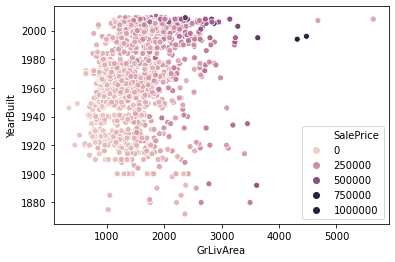

In [20]:
sns.scatterplot(x='GrLivArea', y='YearBuilt', data=train_df, hue='SalePrice')

In [21]:
X_train

,0,1
1017,0.082841,-0.295952
1045,-0.520318,0.414118
1196,0.482134,0.661595
1163,-0.906150,-0.490127
380,-0.678977,0.334164
...,...,...
1132,-0.798602,1.322170
1081,-0.603425,-0.905127
1358,-0.043080,0.109530
1099,-0.301216,0.162833


In [22]:
Y_train

,2
1017,0.421700
1045,-0.538802
1196,1.150356
1163,-0.075111
380,-1.565545
...,...
1132,-3.022858
1081,-0.273836
1358,0.951632
1099,0.222975


In [23]:
#SVMの実装
from sklearn.svm import SVC
ｓｖm_model = SVC(gamma='scale')
ｓｖm_model.fit(X_train.round().astype(int), Y_train.round().astype(int))
Y_pred_svm = ｓｖm_model.predict(X_test.round().astype(int))

print(pd.DataFrame(Y_test.round().astype(int)[:10]))
print(pd.DataFrame(Y_pred_svm[:10]))

      2
12    0
1259  0
171   0
1105  1
320   1
840  -2
873  -1
1181  1
775   1
1265  1
   0
0  0
1  0
2  1
3  1
4  1
5 -2
6 -2
7  1
8  0
9  1


/Users/harakenken22/.pyenv/versions/anaconda3-2020.07/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5232876712328767

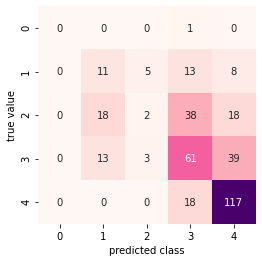

In [24]:
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
mat = confusion_matrix(Y_test.round().astype(int), Y_pred_svm)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')
metrics.accuracy_score(Y_test.round().astype(int), Y_pred_svm)

In [25]:
#決定木
from sklearn import tree #決定木のメソッドを呼び起こす
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree


Y_train_cart = train_df_target
X_train_cart = train_df_explain
clf = DecisionTreeClassifier()
clf_dicision = clf.fit(X_train_cart.values, Y_train_cart.values)

In [26]:
Y_train_cart

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [27]:
clf_dicision

DecisionTreeClassifier()

IndexError: list index out of range

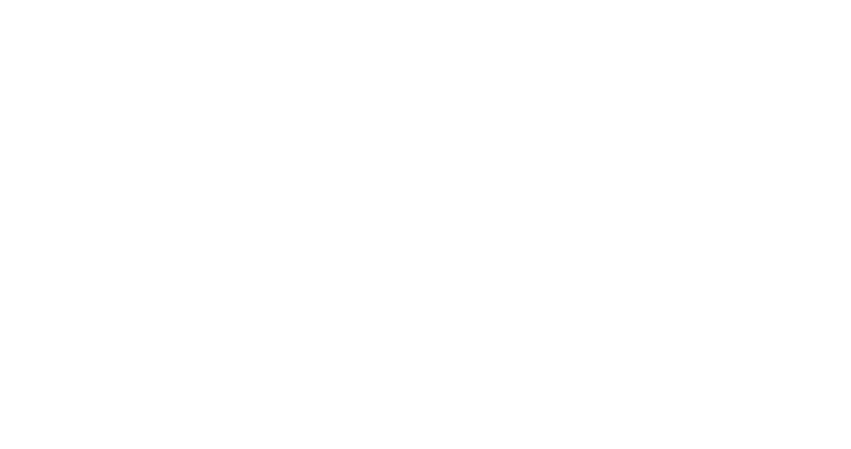

In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
%matplotlib inline

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot()
plot_tree(clf_dicision, feature_names= ['GrLivArea', 'YearBuilt'], ax=ax, class_names=['SalePrice'], filled=True);

In [ ]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# from sklearn.metrics import confusion_matrix
# from pandas.plotting import scatter_matrix


# #データの分割
# train_x_rf = train_df_explain_exp_tar.drop(['SalePrice'], axis=1) # 説明変数のみにする
# train_y_rf = train_df_explain_exp_tar['SalePrice'] # 正解クラス
# train_x, test_x ,train_y, test_y = train_test_split(train_x_rf, train_y_rf, test_size = 0.3, random_state = 42)

# random_forest = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)
# random_forest.fit(train_x, train_y)

# y_pred = random_forest.predict(test_x)

# accuracy_random_forest = accuracy_score(test_y, y_pred)
# print('Accuracy: {}'.format(accuracy_random_forest))


In [ ]:
mat = confusion_matrix(test_y, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')